# Mini project
_authors_: Giulio Benedetti and Cristian Garcia

In [1]:
file = "2023-11-06_09_24_37_Apple Watch.csv"
name = "short_signal"

In [2]:
# Parameters
file = "2023-11-09_09_06_39_Apple Watch.csv"
name = "long_signal2"


## Data Exploration

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/" + file)

df.head()

,loggingTime(txt),accelerometerTimestamp_sinceReboot(s),accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),motionTimestamp_sinceReboot(s),motionYaw(rad),motionRoll(rad),motionPitch(rad),motionRotationRateX(rad/s),...,pedometerCurrentCadence(steps/s),pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),pedometerEndDate(txt),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),label
0,2023-11-09T09:06:39.322+02:00,429420.584410,-0.171768,-0.064575,-0.964111,429420.568248,-0.956379,-0.143840,-0.011829,0.241116,...,0.0,4028.711,2,4,2023-11-09T09:06:35.525+02:00,0.0,0,0.0,0.0,0
1,2023-11-09T09:06:39.335+02:00,429420.604325,-0.152817,-0.025940,-0.989365,429420.588163,-0.955562,-0.142047,-0.008647,0.055939,...,0.0,4028.711,2,4,2023-11-09T09:06:35.525+02:00,0.0,0,0.0,0.0,0
2,2023-11-09T09:06:39.337+02:00,429420.624239,-0.192734,-0.019470,-0.988266,429420.608078,-0.954669,-0.140317,-0.007117,0.049664,...,0.0,4028.711,2,4,2023-11-09T09:06:35.525+02:00,0.0,0,0.0,0.0,0
3,2023-11-09T09:06:39.355+02:00,429420.644154,-0.195480,-0.022629,-1.004211,429420.627992,-0.953742,-0.137456,-0.007111,-0.064136,...,0.0,4028.711,2,4,2023-11-09T09:06:35.525+02:00,0.0,0,0.0,0.0,0
4,2023-11-09T09:06:39.375+02:00,429420.664067,-0.190033,-0.002899,-1.027771,429420.647907,-0.953103,-0.133863,-0.008425,-0.066464,...,0.0,4028.711,2,4,2023-11-09T09:06:35.525+02:00,0.0,0,0.0,0.0,0


**Question A**: Remind yourself what sensors are provided, what they record and what they can be informative about.

Among the 58 variables, the monitored information icludes:
- logging and timestamp `[0, 1, 12, 16, 52]`
- 3D location and corresponding accuracy `[1:12]`
- 3D acceleration `[12:16]`
- 3D motion (e.g. rotation and gravity) `[16:39]`
- pedometer and activity type `[39:52]`

In [4]:
df.columns

Index(['loggingTime(txt)', 'accelerometerTimestamp_sinceReboot(s)',
       'accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)',
       'accelerometerAccelerationZ(G)', 'motionTimestamp_sinceReboot(s)',
       'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)',
       'motionRotationRateX(rad/s)', 'motionRotationRateY(rad/s)',
       'motionRotationRateZ(rad/s)', 'motionUserAccelerationX(G)',
       'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)',
       'motionAttitudeReferenceFrame(txt)', 'motionQuaternionX(R)',
       'motionQuaternionY(R)', 'motionQuaternionZ(R)', 'motionQuaternionW(R)',
       'motionGravityX(G)', 'motionGravityY(G)', 'motionGravityZ(G)',
       'motionMagneticFieldX(µT)', 'motionMagneticFieldY(µT)',
       'motionMagneticFieldZ(µT)', 'motionHeading(°)',
       'motionMagneticFieldCalibrationAccuracy(Z)', 'pedometerStartDate(txt)',
       'pedometerNumberofSteps(N)', 'pedometerAverageActivePace(s/m)',
       'pedometerCurrentPace(s/m)',

**Question B**: Look into the `accelerometerAcceleration` and `motionUserAcceleration` sensors. What do you think is the relationship between the two? Confirm your suspicion in code.

The two sets of variables appear to be highly correlated. Assumed that there is no lag in the measurement, this is expected, because the accelerometer should detect a greater acceleration as the user speeds up their motion.

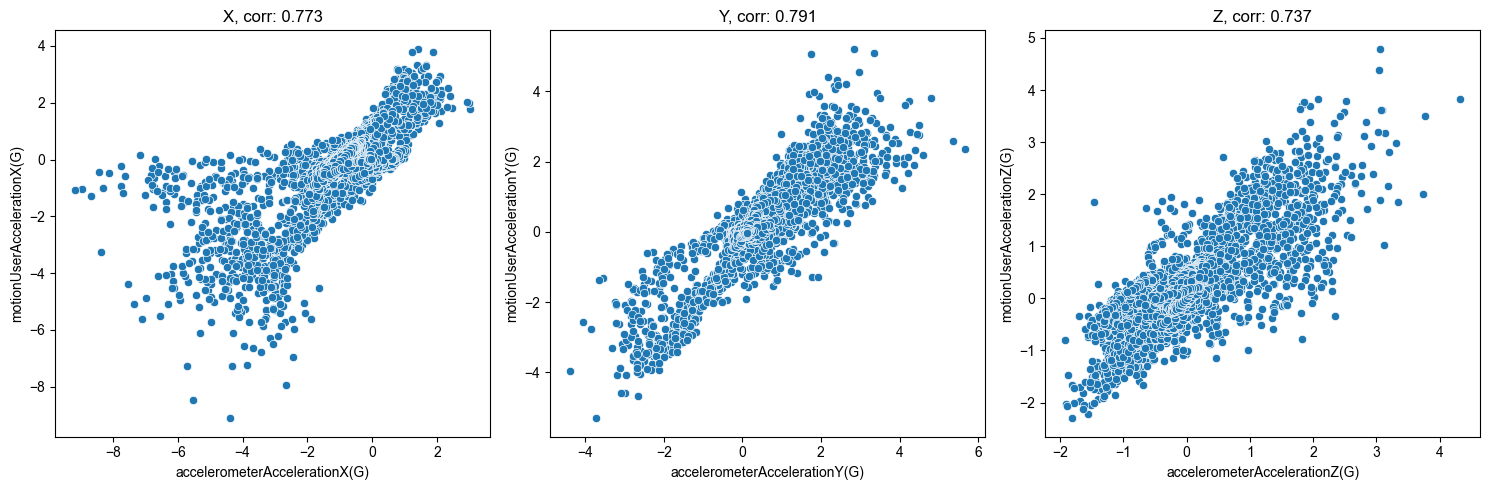

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

#Calculate the correlation coefficient between each accelerometer and motion axis and access them in the matrix generated
corrX = np.corrcoef(df["accelerometerAccelerationX(G)"], df["motionUserAccelerationX(G)"])[1, 0]
corrY = np.corrcoef(df["accelerometerAccelerationY(G)"], df["motionUserAccelerationY(G)"])[1, 0]
corrZ = np.corrcoef(df["accelerometerAccelerationZ(G)"], df["motionUserAccelerationZ(G)"])[1, 0]

#Plot Accelerometer (Y axis) and Motion (X axis)
fig, axes = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(15)
sns.set_style("ticks")

sns.scatterplot(df, x="accelerometerAccelerationX(G)", y="motionUserAccelerationX(G)", ax=axes[0])
sns.scatterplot(df, x="accelerometerAccelerationY(G)", y="motionUserAccelerationY(G)", ax=axes[1])
sns.scatterplot(df, x="accelerometerAccelerationZ(G)", y="motionUserAccelerationZ(G)", ax=axes[2])

axes[0].set_title(f"X, corr: {corrX:.3f}")
axes[1].set_title(f"Y, corr: {corrY:.3f}")
axes[2].set_title(f"Z, corr: {corrZ:.3f}")

plt.tight_layout()

**Question C**: What useful features could be extracted from the three axes of these recordings?

Because acceleration is defined as the change in velocity, these variables can be used to assess motion status and direction: motion is stable in a given direction when corresponding acceleration is zero, and it undergoes change when acceleration is non-zero. Thus, the plots will show a linear graph with a positive slope, crossing the (0,0) coordinate.

**Question E**: One of the first things, which is important to know is the Frequency sampling (Fs). We are not provided it directly, but how can we approximate it given the data?

Mean sampling frequency was 50.22 Hz. The sampling intervals seemed to vary more at the beginnig and at the end of the measurement, when motion may be less constant. In the centre, sampling frequency became relatively stable at 50.22 Hz.

In [6]:
import datetime as dt

#Adapt data from loggingTime(txt) into datetime format
sample_times = [dt.datetime.strptime(time, "%Y-%m-%dT%H:%M:%S.%f+02:00") for time in df["loggingTime(txt)"]]

#Calculate the differences between consecutive time points and store it in a matrix  
sample_diffs = np.array([time.microseconds for time in np.diff(sample_times)]) / 1e6

#Create a new collumn with elapsed time starting at 0 (becomes relevant in question D)
df["Time"] = np.array([time.seconds + time.microseconds / 1e6 for time in np.array(sample_times) - sample_times[0]])

#Using formula of frequency and mean value for Delta time calculated in sample_diffs
sample_freq = 1 / np.mean(sample_diffs)

print(f"Mean Interval: {np.mean(sample_diffs):.4f} s")
print(f"Standard deviation: {np.std(sample_diffs):.4f} s")
print(f"Minimum: {np.min(sample_diffs)} s, Maximum: {np.max(sample_diffs)} s")
print(f"Sampling frequency: {sample_freq:.2f} Hz")

Mean Interval: 0.0199 s
Standard deviation: 0.0008 s
Minimum: 0.001 s, Maximum: 0.076 s
Sampling frequency: 50.22 Hz


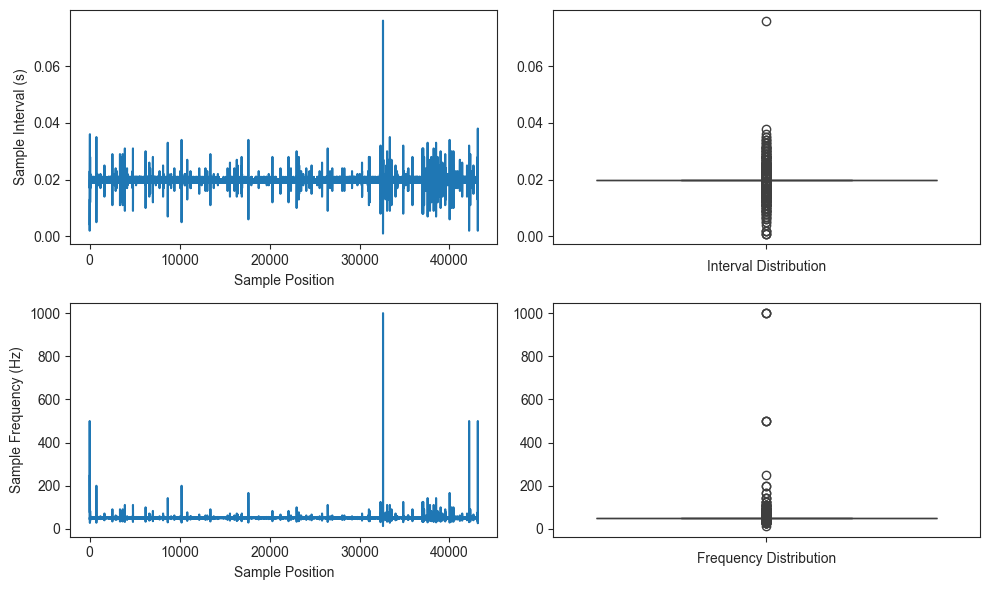

In [7]:
#Plot interval over time and its distribution AND plot frequency over time and its distribution
fig, axes = plt.subplots(2, 2)

fig.set_figheight(6)
fig.set_figwidth(10)
sns.set_style("ticks")

sns.lineplot(x=df.index[:-1], y=sample_diffs, ax=axes[0, 0])
axes[0, 0].set_xlabel("Sample Position")
axes[0, 0].set_ylabel("Sample Interval (s)")

sns.boxplot(y=sample_diffs, ax=axes[0, 1])
axes[0, 1].set_xlabel("Interval Distribution")

sns.lineplot(x=df.loc[500:-500], y=1/sample_diffs, ax=axes[1, 0])
axes[1, 0].set_xlabel("Sample Position")
axes[1, 0].set_ylabel("Sample Frequency (Hz)")

sns.boxplot(y=1/sample_diffs, ax=axes[1, 1])
axes[1, 1].set_xlabel("Frequency Distribution")

plt.tight_layout()

**Qestion F**: Given the found Fs, how many seconds are we observing in each session?

As shown above, we see an average of 20 milliseconds per sample. In total, the measurement was about 859-second long.

In [8]:
# Compute measurement length
mes_len = sample_times[-1] - sample_times[0]
mes_len = mes_len.seconds + mes_len.microseconds / 1e6

print(f"Total length of the measurement: {mes_len} s")

Total length of the measurement: 859.376 s


**Qestion D**: Plot (in any helpful way for you) pieces of data to explore what it looks like and what can be guessed about it based on the visual inspection. What are some of the interesting recorded sensors?

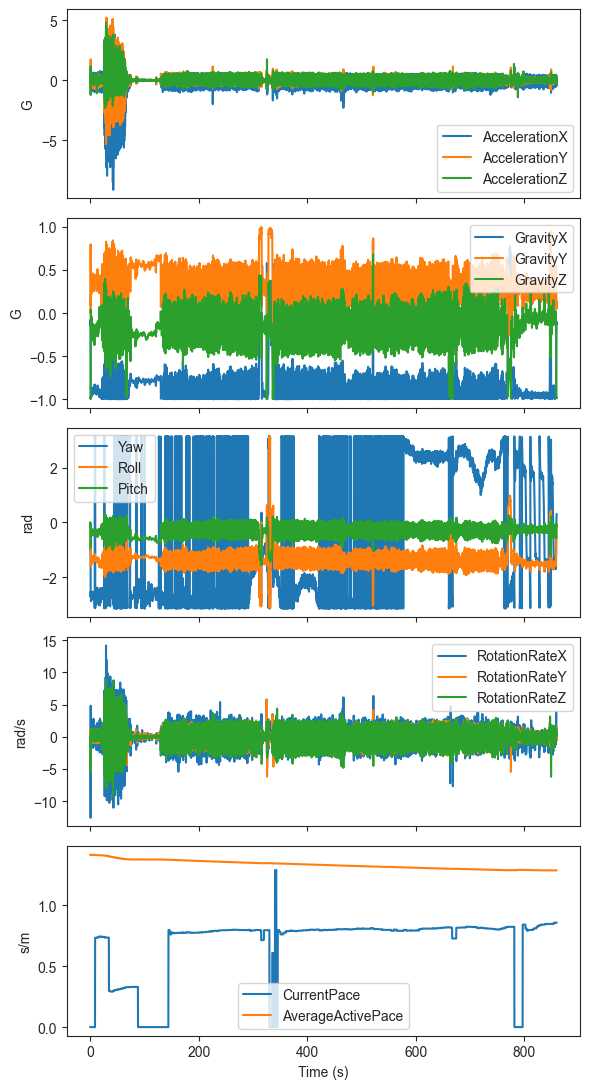

In [9]:
import re

#Given the five sets sensors, we have a linearly plotting function intaking the dataframe, list of variable names, and display axis
def plot_combinations(df, ylist, ax):

    for y in ylist:

        #from list, variable names were stripped apart and core information was selected to substitute variable name
        ylab = re.sub("(motion|pedometer)(User)?(.+)\(.+\)", "\\3", y)

        #Line plot with previously created variable "Time" and each variable in ylist
        sns.lineplot(df, x="Time", y=y, ax=ax, label=ylab)

    ax.legend()

    #For each plot, make y axis read the unit in parenthesis for each set of sensor
    ax.set_ylabel(re.sub(".+\((.+)\)", "\\1", ylist[0]))

plot_num = 5
fig, axes = plt.subplots(plot_num, sharex=True)

fig.set_figheight(2.2 * plot_num)
fig.set_figwidth(6)
sns.set_style("ticks")

plot_combinations(df, ["motionUserAccelerationX(G)", "motionUserAccelerationY(G)", "motionUserAccelerationZ(G)"], ax=axes[0])
plot_combinations(df, ["motionGravityX(G)", "motionGravityY(G)", "motionGravityZ(G)"], ax=axes[1])
plot_combinations(df, ["motionYaw(rad)", "motionRoll(rad)", "motionPitch(rad)"], ax=axes[2])
plot_combinations(df, ["motionRotationRateX(rad/s)", "motionRotationRateY(rad/s)", "motionRotationRateZ(rad/s)"], ax=axes[3])
plot_combinations(df, ["pedometerCurrentPace(s/m)", "pedometerAverageActivePace(s/m)"], ax=axes[4])

axes[4].set_xlabel("Time (s)")
plt.tight_layout()


## Data Analysis

**Question A**: After the initial exploration, what can you say about the structure of the data? On different time-scales, what do you think the different intervals represent?

The data seems to aggregate more readings at the beggining and at the end of the recordings. On different time-scales, the intervals are on average similar, at 20 msec, but when they differ they tend to increase--which can represent internal mechanisms to capture data more frequently due to sudden changes in steady states.

**Question B**: Using the tools we have learned, can you find the frequency of the steps? How? Describe in words the meaning behind your calculations.

According to FFT, the step frequency is about 0.05 Hz. This is unlikely, because it would convert to a strikingly slow step cadence of about 1 step every 20 seconds. A mistake might be present either in the conversion to frequency domain by FFT, or in the choice of the base frequency from the FFT plot.

In [10]:
# Find number of observations
signal_length = len(df["Time"])
# Convert time scale to frequency scale
freq = np.fft.fftfreq(signal_length)[:signal_length // 2]

# Perform FFT for the signal in every coordinate
spx = np.fft.fft(df["motionUserAccelerationX(G)"])[:signal_length // 2]
spy = np.fft.fft(df["motionUserAccelerationY(G)"])[:signal_length // 2]
spz = np.fft.fft(df["motionUserAccelerationY(G)"])[:signal_length // 2]

# Find base frequency in every coordinate
step_freqX = freq[np.where(spx == max(spx))]
step_freqY = freq[np.where(spy == max(spy))]
step_freqZ = freq[np.where(spz == max(spz))]

# Take average of base frequency over coordinates
step_freq = (step_freqX + step_freqY + step_freqZ) / 3
print(f"The step frequency is {step_freq[0]:.3f} Hz.")

The step frequency is 0.024 Hz.


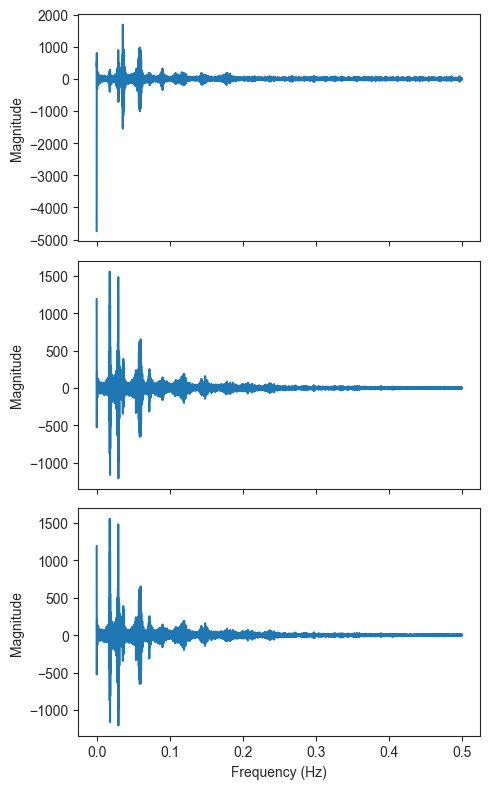

In [11]:
fig, axes = plt.subplots(3, 1, sharex=True)

fig.set_figheight(8)
fig.set_figwidth(5)

axes[0].plot(freq, spx.real)
axes[0].set_ylabel("Magnitude")
axes[0].legend("X coordinate")

axes[1].plot(freq, spy.real)
axes[1].set_ylabel("Magnitude")
axes[1].legend("Y coordinate")

axes[2].plot(freq, spz.real)
axes[2].set_ylabel("Magnitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].legend("Z coordinate")

plt.tight_layout()

**Question C**: Using specgram or an alternative, plot and analyse the signals’ frequencies’ prevalence over time.

Text(0.5, 0, 'Time (s)')

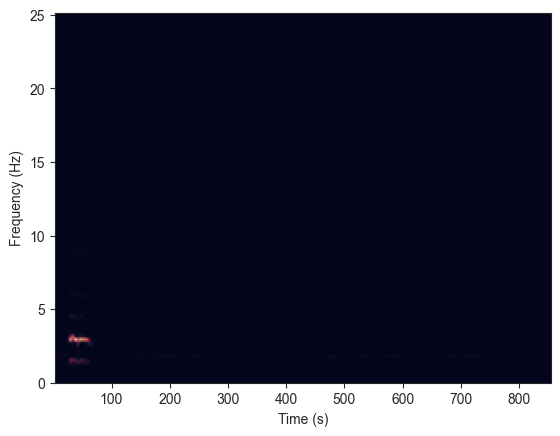

In [12]:
from scipy import signal

f, t, Sxx = signal.spectrogram(df["motionUserAccelerationX(G)"], fs=sample_freq)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

**Question D**: Are the sessions stationary?

We define a stationary random process as a set of signals produced over time, each of whose points are random variables drawn from the same distribution regardless of their position in time. Therefore, it follows that the decision of considering a signal stationary or not chiefly depends on the time range under inspection: shorter signals may better reflect stationary processes, whereas longer signals may appear more subject to periodicity.

With that said, it is safe to consider walking and running sessions as stationary random processes, when looked at individually. Here, based on `motionUserAcceleration` we can infer that the portions of signal from 0 to 25 s, and between 25 and 30 s well represent stationary random processes. However, the signal over its full length contains multiple sessions, and thus it is not stationary.

**Question E**: Are the sessions ergodic?

We define an ergodic process as a set of signals produced over time, whose points from the begin to the end of each signal are drawn from a distribution that is identical to that of any random variable from the signal. Whereas all ergodic processes are also random stationary, not all of the latter meet the conditions to be ergodic. For example, if the random variables from two signals are drawn from a single bimodal distribution, but each signal contains random variables from only one mode of that distribution, the process is stationary but not ergodic.

With that said, we could consider the signals ergodic only if each signal contained either walking or running sessions, but not both. Because the two are actually combined, the process is not ergodic. However, if we narrow down the signals to one activity type, the process can be considered ergodic. Here, based on `motionUserAcceleration` the signal upto 25 s and that from 30 s on are ergodic with respect to one another.

**Question F**: Combining the answers to the previous questions, what could different
periods of the signal represent?

Different periods of the signal represent different activity states, such as walking and running.

**Question G**: Can you distinguish between two types of steps (are they right and left
steps)? How? ‘Try and error’ your approaches. Are you basing your
supposition on external data?

As shown above, right and left steps can be seen as positive and negative peaks based on `rotationRate`, because the watch is oppositely rotated in the two sides.

**Question H**: Were there unmentioned sensors that proved more useful for your
analysis?

Although `motionUserAcceleration(G)` was mainly used, `motionUserRotationRate(rad/s)` also showed similar patterns that may prove relevant for further analysis. In addition, the information on gravity, pitch, yaw, roll and pedometer seemed to vary with activity mode, but most of them showed a non-stationary behaviour.